In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Load the dataset
dataset_path = "data/Telecom Churn Rate Dataset.xlsx"
data = pd.read_excel(dataset_path)


In [3]:
# Step 2: Initial data inspection
print("Initial data shape:", data.shape)
print("\nColumn info:")
data.info()


Initial data shape: (7043, 23)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 1

In [4]:
# Step 3: Handle missing and inconsistent data
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop rows or impute missing values (if any)
data.dropna(inplace=True)

# Convert TotalCharges to numeric (handle non-numeric entries)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("\nUnique values in 'TotalCharges' after conversion:", data['TotalCharges'].nunique())

# Drop rows with NaN in TotalCharges
data.dropna(subset=['TotalCharges'], inplace=True)


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

Unique values in 'TotalCharges' after conversion: 6530


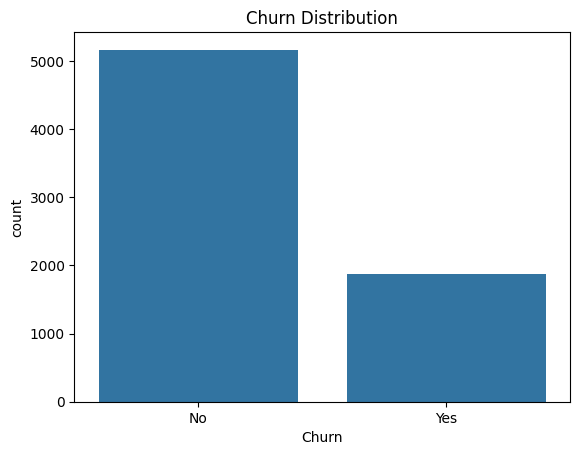

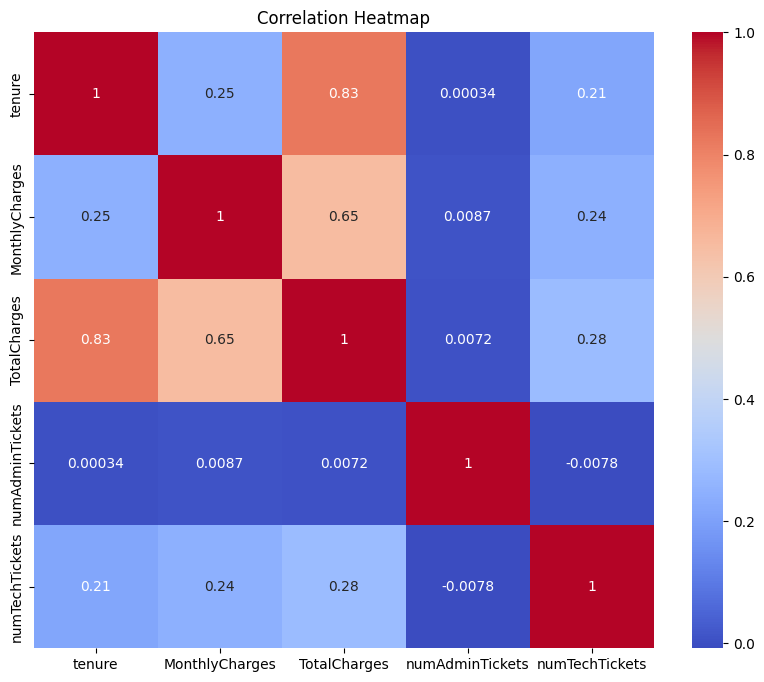

In [5]:
# Step 4: Data visualization (EDA)
# Plot churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
# Step 5: Data preprocessing
print(data.columns)

# Step 5: Data preprocessing
# Verificar nombres de columnas
print("Columnas en el dataset:", data.columns)

# Lista de columnas categóricas corregida
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Codificar variables categóricas
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Escalar características numéricas
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')
Columnas en el dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')


In [10]:
# Verificar si hay columnas no numéricas en X
non_numeric_columns = X.select_dtypes(include=['object']).columns.tolist()
print("Columnas no numéricas en X:", non_numeric_columns)

# Eliminar columnas irrelevantes y convertir a numéricas
X = X.drop(columns=['customerID'], errors='ignore')  # Excluir columnas como 'customerID'

# Asegurar que todos los datos son numéricos
X = X.apply(pd.to_numeric, errors='coerce')  # Convertir valores a numéricos
if X.isnull().sum().sum() > 0:
    print("Advertencia: Hay valores nulos después de la conversión. Revisando...")
    print(X.isnull().sum())

# Rehacer la división de datos (asegurando limpieza)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:\\n", classification_report(y_test, y_pred_lr))


Columnas no numéricas en X: ['customerID']
Logistic Regression Report:\n               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1549
           1       0.73      0.68      0.71       561

    accuracy                           0.85      2110
   macro avg       0.81      0.80      0.80      2110
weighted avg       0.85      0.85      0.85      2110



Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      1549
           1       0.73      0.66      0.69       561

    accuracy                           0.84      2110
   macro avg       0.80      0.79      0.79      2110
weighted avg       0.84      0.84      0.84      2110



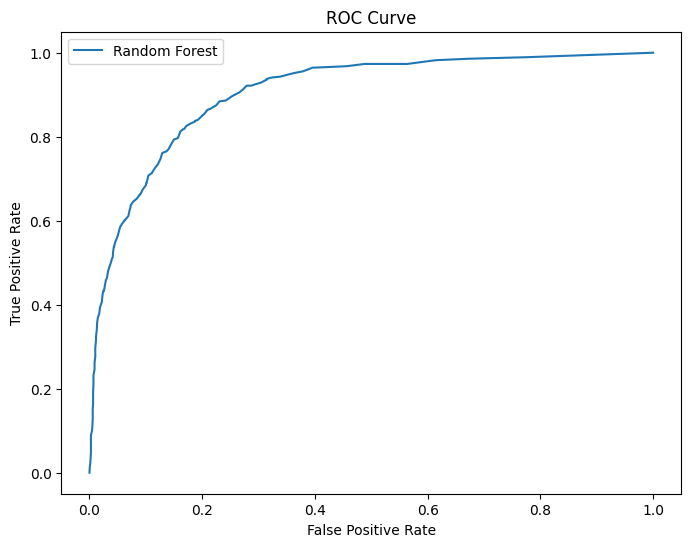

In [12]:
# Step 6: Model training and evaluation

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Entrenar el modelo
y_pred_rf = rf.predict(X_test)  # Predicciones
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Step 7: ROC Curve for Random Forest
# Obtener probabilidades de predicción
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
